#  Exploring Density Profiles and Black Hole Horizon Conditions

This notebook explores the interplay between **cosmic density profiles** and **black hole horizon conditions** in a modified Schwarzschild framework. We visualize how different parameters affect Hawking temperature, entropy, mass accumulation, and horizon formation.

---

##  Model Overview

We begin with a **universal density profile** defined as:
$$
\rho(r) = \rho_0 \left[1 + \delta_c \left( 1 - \frac{ \left( \frac{r}{r_s} \right)^{\alpha} }{ 1 + \left( \frac{r}{r_v} \right)^{\beta} } \right) \right]
$$


Where:
- $\rho_0$: baseline density  
- $\delta_c$: contrast parameter (negative for density dips)  
- $r_s, r_v$: scale and virial radii  
- $\alpha, \beta$: shape parameters

With:

$$
\alpha = -2\left(\frac{r_s}{r_v} - 2\right)
$$

$$
\beta = 
\begin{cases}
17.5 \cdot \dfrac{r_s}{r_v} - 6.5 & \text{if } \dfrac{r_s}{r_v} < 0.91 \\
-9.8 \cdot \dfrac{r_s}{r_v} + 18.4 & \text{otherwise}
\end{cases}
$$

---

##  Mass Accumulation

The **mass function** is computed via:

$$
M(r) = \int_0^r 4\pi r'^2 \rho(r') \, dr'
$$

We also define a **horizon condition function**:

$$
f(r) = 1 - \frac{2M(r)}{r}
$$

The radius $r_h$ such that $f(r_h) = 0$ marks the horizon location.

---

##  Hawking Temperature and Entropy

We compute the **Hawking temperature** as:

$$
T_H(r_h) = \frac{1}{4\pi r_h} \left[ 1 - \frac{8\pi \rho_0 r_h^2 \left(1 - \left(\frac{r_h}{r_v}\right)^\beta + \delta_c - \delta_c \left(\frac{r_h}{r_s}\right)^\alpha \right)}{1 + \left(\frac{r_h}{r_v}\right)^\beta} \right]
$$

The **black hole entropy** is:

$$
S(r_h) = \pi r_h^2
$$

---

## Plot Modules

You can generate any combination of the following plots by specifying the `plots=` argument in the `main()` function.

### 1. `'temp'` and `'entropy'`
Plots of Hawking temperature and entropy vs. radius for different $\delta_c$ values.

### 2. `'density'`
Plots of $\rho(r)$ for multiple $\delta_c$ values. Includes a dashed line at $\rho_0$ as a reference.

### 3. `'f_fixed_mass'`
Plots of $f(r) = 1 - \frac{2M}{r}$ for a **fixed mass** (e.g., $M = 10$), useful for studying possible horizon formation regions. Here the fixed mass is the mass integration constant which is applied to the integral of the density function. This is equation (2) in the paper.

### 4. `'critical_mass'`
Plots the **mass required** for thermal equilibrium where $T_{hawk}$ = $T_{dS}$ where the hawking temperature and deSitter temperatures are equivalent.

---


##  Example Usage

```python

# Mass horizon function for fixed M = 10:
main(plots=('f_fixed_mass',), r_s=80, r_v=100, rho_o=3e-5,
     delta_c_values=[-0.90, -0.95, -0.99], r_range=(0.1, 80), r_points=300)

# Plot critical mass required to form horizons at different radii:
main(plots=('critical_mass',), r_s=80, r_v=100, rho_o=3e-5,
     delta_c_values=[-0.90], r_range=(0.1, 150))


In [215]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.optimize import root_scalar
from scipy.special import hyp2f1
from scipy.constants import G, c, pi

In [217]:
# All the core functions for us to modify you could choose your own integration method /mod that

def alpha_fn(r_s, r_v):
    return -2 * ((r_s / r_v) - 2)

def beta_fn(r_s, r_v):
    frac = r_s / r_v
    return 17.5 * frac - 6.5 if frac < 0.91 else -9.8 * frac + 18.4

def density_profile(r, r_s, r_v, alpha, beta, rho_o, delta_c):
    return rho_o * (1 + delta_c * ((1 - (r / r_s)**alpha )/ (1 + (r / r_v)**beta)))

def mass_function(r_vals, rho_vals):
    integrand = 4 * np.pi * r_vals**2 * rho_vals
    return cumulative_trapezoid(integrand, r_vals, initial=0)

def f_of_r(M_vals, r_vals):
    return 1 - (2 * M_vals / r_vals)

def f_of_r_fixed_mass(r_vals, M_fixed):
    return 1 - (2 * M_fixed / r_vals)

def mass_function_fixed(r_vals, M_fixed, delta_c, rho_0, alpha, beta, r_v, r_s):
    
    r = np.asarray(r_vals)
    x = (r / r_v) ** beta
    y = (r / r_s) ** alpha

    F1 = hyp2f1(1, 3/beta, (3+beta)/beta, -x)
    F2 = hyp2f1(1, (3+alpha)/beta, (3+alpha+beta)/beta, -x)

    term = 1 + delta_c * F1 - (3 / (3 + alpha)) * y * delta_c * F2

    M_r = M_fixed + (4 * np.pi / 3) * r**3 * rho_0 * term
    
    return 1 - (2*M_r/r_vals)
    

def hawking_temp(r_h, r_v, delta_c, rho_o, r_s, alpha, beta):
    num = 8 * rho_o * np.pi * r_h**2 * (1 - (r_h / r_v)**beta + delta_c - delta_c * (r_h / r_s)**alpha)
    denom = 1 + (r_h / r_v)**beta
    return (1 / (4 * np.pi * r_h)) * (1 - num / denom)

def entropy(r_h):
    return np.pi * r_h**2

def critical_mass_fermi(rho_0, delta_c):
    """
    Returns critical mass M where T_H = T_dS in SI units. This a continution of my fermi problem subbing in their expression of \lambda
    as a function of the void's emptiness paramter.
    """
    term = np.sqrt((8 * pi / 3) * rho_0 * (1 + delta_c))
    return c**3 / (4 * G * term)


<>:48: SyntaxWarning: invalid escape sequence '\l'
<>:48: SyntaxWarning: invalid escape sequence '\l'
/var/folders/s3/k10ndpwd081513s5h91mkwtm0000gn/T/ipykernel_84235/2270485321.py:48: SyntaxWarning: invalid escape sequence '\l'
  """


In [239]:
# All the functions for plotting

def plot_temperature_entropy(r_vals, delta_c_values, r_s, r_v, rho_o, save_path=None):
    alpha = alpha_fn(r_s, r_v)
    beta = beta_fn(r_s, r_v)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    for delta_c in delta_c_values:
        temps = [hawking_temp(r, r_v, delta_c, rho_o, r_s, alpha, beta) for r in r_vals]
        entrs = [entropy(r) for r in r_vals]
        ax1.plot(r_vals, temps, label=f"δ_c = {delta_c:.2f}")
        ax2.plot(r_vals, entrs, label=f"δ_c = {delta_c:.2f}", linestyle='--')

    ax1.set_title('Hawking Temperature vs Radius')
    ax1.set_xlabel('Radius $r_h$')
    ax1.set_ylabel('Temperature $T_h$')
    ax1.grid(True)
    ax1.legend()

    ax2.set_title('Entropy vs Radius')
    ax2.set_xlabel('Radius $r_h$')
    ax2.set_ylabel('Entropy $S$')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

def plot_density_profiles(r_vals, delta_c_values, r_s, r_v, rho_o, save_path=None):
    alpha = alpha_fn(r_s, r_v)
    beta = beta_fn(r_s, r_v)
    print(alpha,beta)

    plt.figure(figsize=(10, 5))
    for delta_c in delta_c_values:
        rho_vals = density_profile(r_vals, r_s, r_v, alpha, beta, rho_o, delta_c)
        plt.plot(r_vals, rho_vals, label=f"δ_c = {delta_c:.2f}")
    plt.axhline(rho_o, color='gray', linestyle='--', label='ρ₀')
    plt.title('Universal Density Profile')
    plt.xlabel('Radius r')
    plt.ylabel('Density ρ(r)')
    plt.grid(True)
    plt.legend()
    #plt.xscale('log')
    #plt.yscale('log')
    #plt.ylim(0,0.00004)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

def plot_f_r_fixed_mass(M_fixed, delta_c_values, r_s, r_v, rho_o, r_vals, save_path=None):
    alpha = alpha_fn(r_s, r_v)
    beta = beta_fn(r_s, r_v)

    plt.figure(figsize=(10, 5))
    for delta_c in delta_c_values:
        f_vals = mass_function_fixed(r_vals, M_fixed, delta_c, rho_o, alpha, beta, r_v, r_s)
        plt.plot(r_vals, f_vals, label=f"δ_c = {delta_c:.2f}")
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Radius r')
    plt.ylabel('f(r) = 1 - 2M/r')
    plt.title('f(r) for Fixed Mass M')
    plt.xlim(10,80)
    plt.ylim(-1.0,1.0)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Plot saved to {save_path}")
    else:
        plt.show()


def fermi_critical(r_s,r_v,rho_o=3e-5,
                   delta_c_range=np.linspace(-0.99, 0, 100)):
    alpha = alpha_fn(r_s, r_v)
    beta = beta_fn(r_s, r_v)

    M_crit_list = []

    for delta_c in delta_c_range:
        mass_val = critical_mass_fermi(rho_o,delta_c)
        M_crit_list.append(mass_val)

    plt.figure(figsize=(8, 5))
    plt.plot(delta_c_range, M_crit_list)
    plt.xlabel(r'$\delta_c$')
    plt.ylabel(r'$M_{\mathrm{crit}}$')
    plt.title('Critical Mass where $T_H = T_{\mathrm{dS}}$')
    plt.grid(True)
    #plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.show()

<>:100: SyntaxWarning: invalid escape sequence '\m'
<>:100: SyntaxWarning: invalid escape sequence '\m'
/var/folders/s3/k10ndpwd081513s5h91mkwtm0000gn/T/ipykernel_84235/3067086750.py:100: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Critical Mass where $T_H = T_{\mathrm{dS}}$')


In [221]:
def main(
    plots=('temp', 'density', 'f_fixed_mass'),
    r_s=80, 
    r_v=100, 
    rho_o=.00003,
    delta_c_values=np.linspace(-0.90, -0.99, 3), 
    r_range=(1, 50), 
    r_points=300,
    M_fixed=10,
    filenames=None  # Dictionary for saving plots, e.g., {'temp': 'my_temp_plot.png'}
):
    r_vals = np.linspace(r_range[0], r_range[1], r_points)
    filenames = filenames or {}

    if 'temp' in plots or 'entropy' in plots:
        print("Generating temperature and entropy plots...")
        plot_temperature_entropy(
            r_vals, delta_c_values, r_s, r_v, rho_o,
            save_path=filenames.get('temp')
        )

    if 'density' in plots:
        print("Generating density profile plots...")
        plot_density_profiles(
            r_vals, delta_c_values, r_s, r_v, rho_o,
            save_path=filenames.get('density')
        )

    if 'f_fixed_mass' in plots:
        print(f"Generating f(r) plot for fixed mass M = {M_fixed}...")
        plot_f_r_fixed_mass(
            M_fixed, delta_c_values, r_s, r_v, rho_o, r_vals,
            save_path=filenames.get('f_fixed_mass')
        )
        
    if 'fermi_critical_vs_delta' in plots:
        print("Plotting M_crit vs delta_c for fixed r...")
        fermi_critical(r_s,r_v,rho_o=3e-5,
                   delta_c_range=np.linspace(-0.99, 0, 100))
    

Generating temperature and entropy plots...


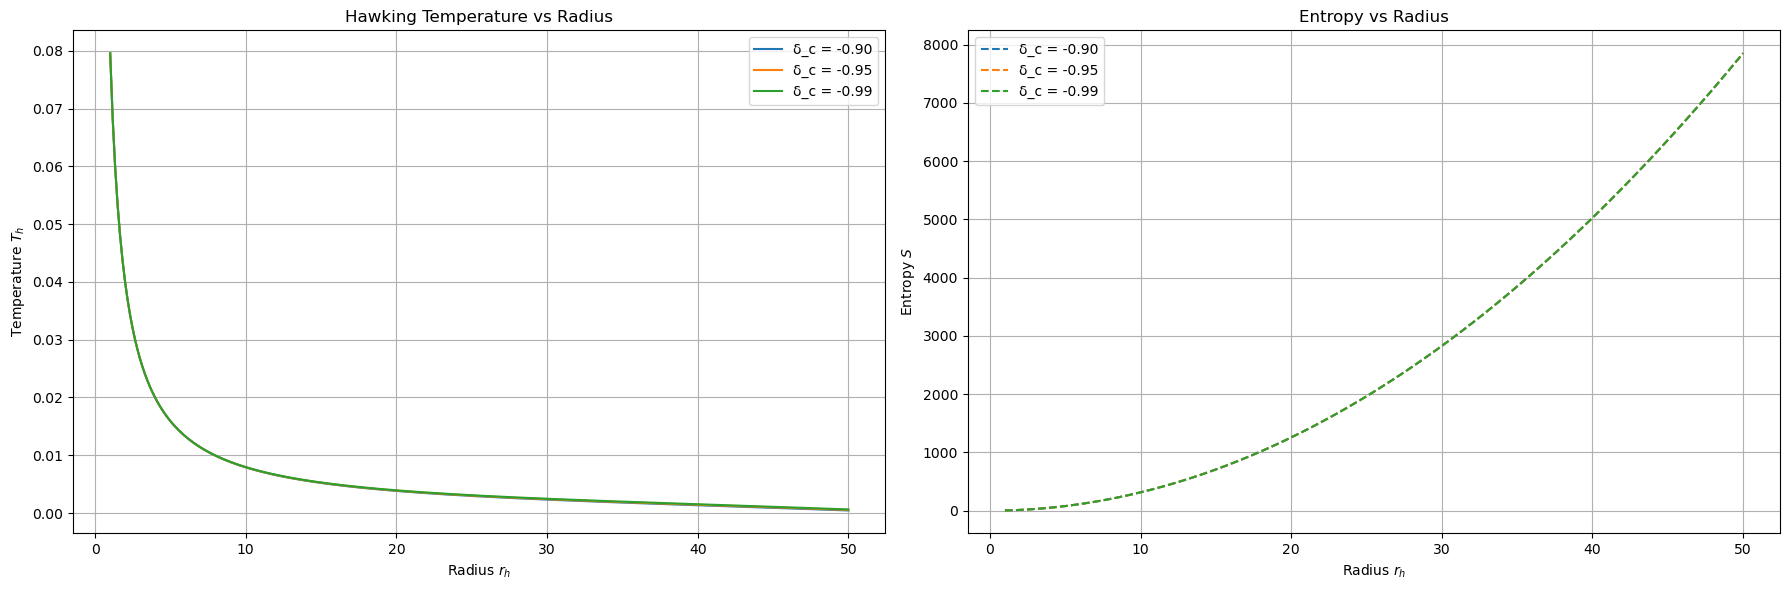

In [223]:
main(
    plots=('temp',),
    r_s=80,
    r_v=100,
    rho_o=3e-5,
    r_range=(1, 50)
)

Generating density profile plots...
2.4 7.5


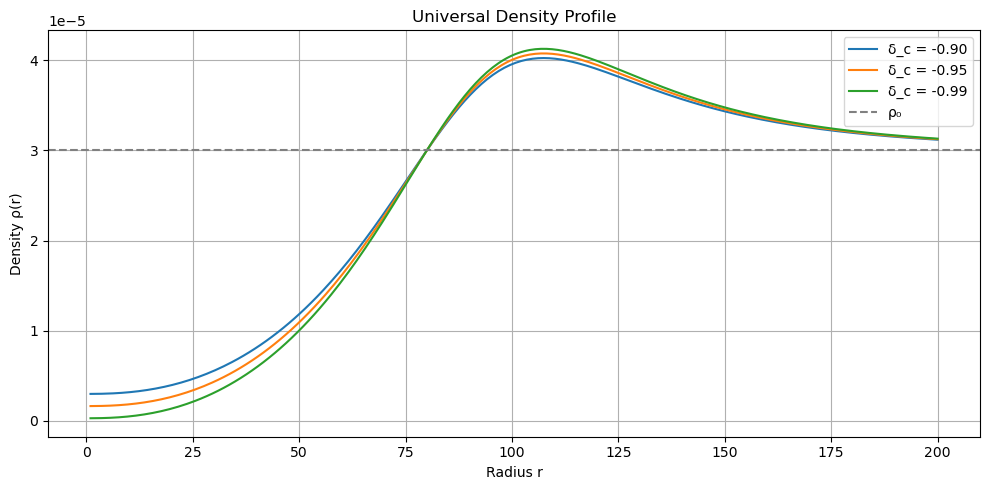

In [224]:
main(
    plots=('density',),
    r_s=80,
    r_v=100,
    rho_o=0.00003,
    r_range=(1, 200)
)

Generating f(r) plot for fixed mass M = 10...


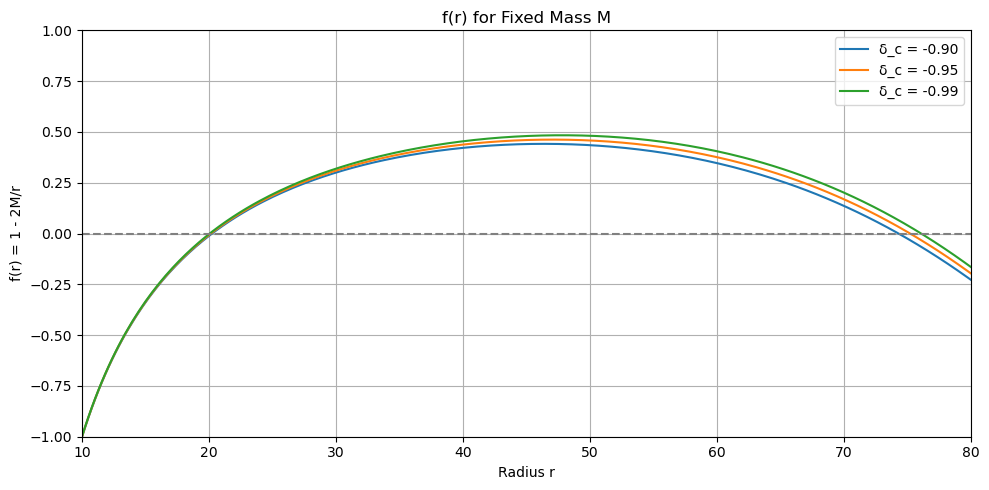

In [227]:
main(
    plots=('f_fixed_mass',),
    r_s=80,
    r_v=100,
    rho_o=3e-5,
    r_range=(1, 80),
    M_fixed=10
    
)

Plotting M_crit vs delta_c for fixed r...


/var/folders/s3/k10ndpwd081513s5h91mkwtm0000gn/T/ipykernel_84235/3067086750.py:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


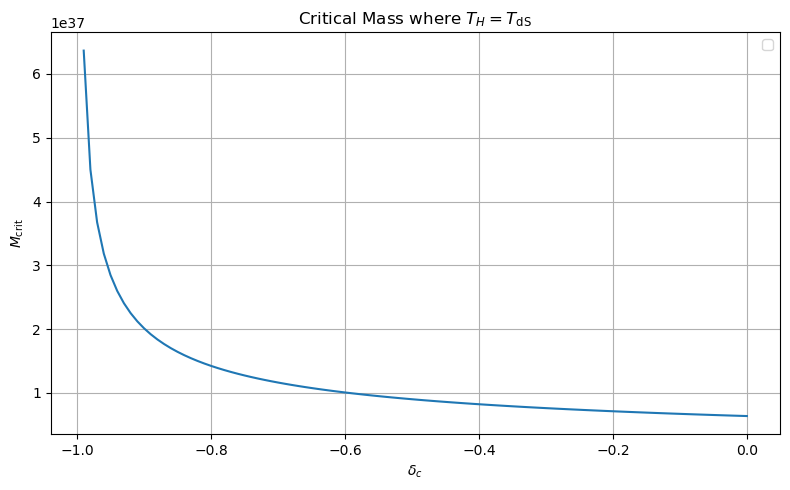

In [241]:
main(
    plots=('fermi_critical_vs_delta',),
    rho_o=3e-5,
)